## Домашнє завдання на тему "Перевірка вибірки на нормальність"

0.Зчитайте дані з `data.csv` та запишіть значення колонки data у форматі np.ndarray в змінну data. Ми будемо далі працювати з цією змінною.

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = '../Модуль 6 Статистика/data.csv'
df = pd.read_csv(data_path)

In [3]:
data = df['data'].to_numpy()

Запустіть код нижче. Для коректної робити всіх подальших методів дані мають бути у вигляді одновимірного вектора, тобто мати розмір (100,).

In [5]:
data.shape

(100,)

## Перевірка вибірки на нормальність

1.**Візуалізація розподілу**

Подивимось спершу на розподіл наших даних. Для цього побудуємо розподіл даних (графік на вигляд як гістограма, тільки він нормований так, аби сума під кривою була рівна 1), а на нього накладемо лінійний графік щільності (PDF - для побудови використовуємо `scipy.stats.norm.pdf(...)`) теоретичного нормального розподілу з середнім та стандартним відхиленням як у наших даних.

Візуалізацію будуємо за аналогією прикладу, що наводився у лекції, коли ми будували кілька кривих щільності для одних і тих самих даних, тільки значно більш спрощено, бо розподіл для порівняння у нас лише один - нормальний.

Побудуйте графік як наведено в очікуваному результаті та напишіть ваш висновок, чи схоже, що дані розподілені нормально?

Підказка: весь графік будується за 6 рядків коду, три з яких - підписи осей і графіку. Аби побудувати лінійний графік функції щільності та він наклався на гістограму, необхідно задати значення іксів з діапазону значень наших даних. Ці значення вже задані для вас, залишилось дописати 5 рядочків коду :)

In [12]:
from scipy.stats import norm

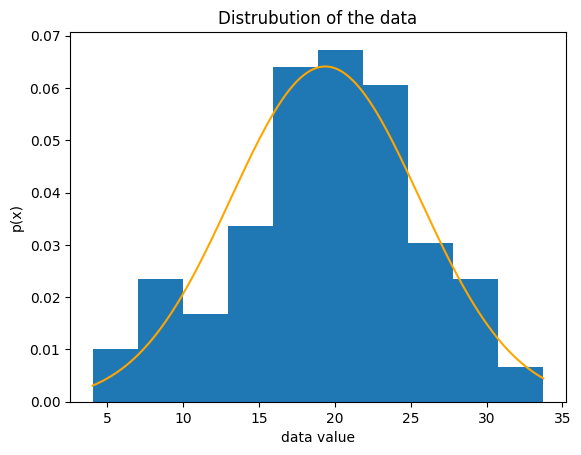

In [ ]:
x_axis = np.arange(data.min(), data.max(), 0.01)
seredne = np.mean(data)
std_vidhyl = np.std(data)
plt.plot(x_axis, norm.pdf(x_axis, seredne, std_vidhyl), color='orange', linewidth=1.5)
plt.hist(data, density=True)
plt.title('Distrubution of the data')
plt.xlabel('data value')
plt.ylabel('p(x)')
plt.show ()

З графіку можна припустити що вони розприділені за нормальни розподілом

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1SB_HOIgwfZXrtglBBlDfMYjg2eGGBSIX)


2.**QQ графік**

Ще одним візуалізаційним методом перевірки розподілу вибірки даних на нормальність є графік квантиль-квантиль, Q-Q графік або QQ графік. У лекції ми розбирали, що це за графік, та як його інтерпретувати.

Побудуйте QQ-Plot для порівняння з нормальним розподілом наших даних та напишіть висновок з графіку, чи можна сказати, що дані розподілені за нормальним законом?

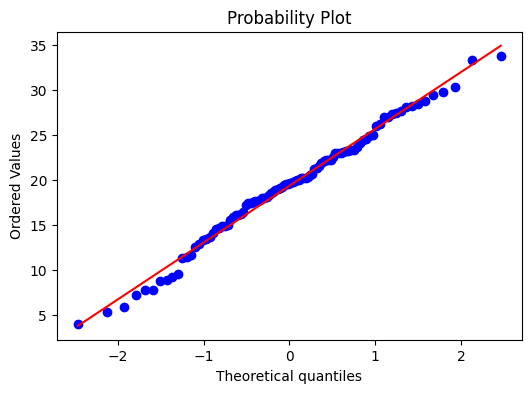

In [44]:
import seaborn as sns
from scipy.stats import probplot
fig, ax = plt.subplots(figsize=(6, 4))
probplot(data, dist="norm", plot=ax)
ax.set_title('Probability Plot')
plt.show()


З графіку можна сказати що вони розприділені за нормальни розподілом

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1-eDd16OVgqEjzFUBjJJzSMcwSrzNNm_V)

3.**Тест Шапіро-Вілка**

Тест Шапіро-Вілка визначає для вибірки, наскільки ймовірно, що вона була витягнута з нормального розподілу.
Нульова гіпотеза H0 тесту Шапіро-Вилка полягає в тому, що випадкова величина, вибірка якої відома, розподілена за нормальним законом. Альтернативна гіпотеза H1 полягає в тому, що закон розподілу **не** є нормальним.

**Задача**: протестувати нашу вибірку на нормальність з допомогою теcта Шапіро-Вілка, реалізованого в функцію [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html). Висновок зробіть на основі аналізу p-значення. На рівні значущості = 0.05 чи можемо ми відхилити гіпотезу Н0? Відповідь можна надати текстом, або написати простий if-else блок для виведення висновку спираючись на отримане p-значення. Нагадування:
- p <= alpha: відхиляємо H0.
- p > alpha: не можемо відхилити H0.

Також пропоную вам переглянути оце [відео](https://youtu.be/eh9eYLBecWk), тут розказується про QQ графік, тест Шапіро, та звʼязок між ними.


In [50]:
from scipy import stats
shapiro_test = stats.shapiro(data)
print("Статистика тесту:", shapiro_test.statistic)
print("P-значення:", shapiro_test.pvalue)

if shapiro_test.pvalue > 0.05:
    print("Hе відхиляємо H0")
else:
    print("Відхиляємо H0")

Статистика тесту: 0.9887855685963715
P-значення: 0.5677973106978921
Hе відхиляємо H0
